<a href="https://colab.research.google.com/github/mashuai191/machine_learning/blob/master/computer_vision/image_compare/anomaly_location_SSIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import cv2
import os

BASE_DIR = 'gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test/dataSet'
#print (os.listdir(BASE_DIR))

In [0]:
import cv2
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from skimage.measure import compare_ssim as ssim



def HumatchLocation(image,template):
    #计算模板相似度
    #image，template:二值灰度图矩阵
    h,w=template.shape[:2]

    H,W=image.shape[:2]
 
    #W = W//2
    print (H,W, h,w)
    simi_value = np.zeros((H-h+1,W-w+1))
    #simi_value = pd.DataFrame(index=list(range(0,H-h+1)), columns=list(range(0, W-w+1)))
    #print (simi_value)
    #simi_value.fillna(0)
    #simi_value = simi_value.to_numpy()
    for i in range(0,(W-w+1)):
        for j in range(0,(H-h+1)):
            image1=image[j:j+h,i:i+w].astype(np.uint8)
            #simi_value.loc[j][i]=cv2.matchShapes(image1,template,cv2.CONTOURS_MATCH_I1,0)
            simi_value[j][i]=cv2.matchShapes(image1,template,cv2.CONTOURS_MATCH_I2,0)
            #print (simi_value[j][i]))
    return simi_value


def SSIMLocation(image,template):
    #计算模板相似度
    #image，template:二值灰度图矩阵
    h,w=template.shape[:2]


    H,W=image.shape[:2]
    #W = W//2
    print (H,W, h,w)
    if (h%2 == 0):
        template = np.vstack((template, [0]*w))
    h,w=template.shape[:2]
    #W=W//2

    print (H,W, h,w)
    simi_value = np.zeros((H-h+1,W-w+1))
    #simi_value = pd.DataFrame(index=list(range(0,H-h+1)), columns=list(range(0, W-w+1)))
    #print (simi_value)
    #simi_value.fillna(0)
    #simi_value = simi_value.to_numpy()
    for i in range(0,(W-w+1)):
        for j in range(0,(H-h+1)):
            image1=image[j:j+h,i:i+w].astype(np.uint8)
            #simi_value.loc[j][i]=cv2.matchShapes(image1,template,cv2.CONTOURS_MATCH_I1,0)
            #print (image1.shape, template.shape)
            simi_value[j][i]=ssim(image1,template)
            
            #print (simi_value[j][i]))
    return simi_value



In [5]:
img_rgb1=cv2.imread(os.path.join(BASE_DIR,'testData/11.png'))
img_rgb = cv2.imread(os.path.join(BASE_DIR,'testData/11.png'),cv2.IMREAD_GRAYSCALE) 
#img = cv2.imread(r'C:\Users\CZZ\Desktop\location\normalData\1.4.png', cv2.IMREAD_GRAYSCALE)
template1 = cv2.imread(os.path.join(BASE_DIR,'templateData2/Left.png'),cv2.IMREAD_GRAYSCALE)
template2 = cv2.imread(os.path.join(BASE_DIR,'templateData2/Middle.png'),cv2.IMREAD_GRAYSCALE)
template3 = cv2.imread(os.path.join(BASE_DIR,'templateData2/Right.png'),cv2.IMREAD_GRAYSCALE)
print (type(img_rgb),img_rgb.shape)
print (img_rgb)
h1, w1 = template1.shape[:2]  # rows->h, cols->w

#res1 = cv2.matchTemplate(img_rgb, template1, cv2.TM_CCORR_NORMED)
#res1 = HumatchLocation(img_rgb, template1)
start = time()
res1 = SSIMLocation(img_rgb, template1)
end = time()
print ("time spent:" end=start)
#print (res1)
min_val1, max_val1, min_loc1, max_loc1 = cv2.minMaxLoc(res1)

<class 'numpy.ndarray'> (425, 950)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
425 950 92 157
425 950 93 157


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:17: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  **kwargs)


In [6]:
res1

array([[0.77948553, 0.77948553, 0.77948553, ..., 0.77948553, 0.77948553,
        0.77948553],
       [0.77948553, 0.77948553, 0.77948553, ..., 0.77948553, 0.77948553,
        0.77948553],
       [0.77948553, 0.77948553, 0.77948553, ..., 0.77948553, 0.77948553,
        0.77948553],
       ...,
       [0.77948553, 0.77948553, 0.77948553, ..., 0.77948553, 0.77948553,
        0.77948553],
       [0.77948553, 0.77948553, 0.77948553, ..., 0.77948553, 0.77948553,
        0.77948553],
       [0.77948553, 0.77948553, 0.77948553, ..., 0.77948553, 0.77948553,
        0.77948553]])

In [7]:
res1.max()

0.9382439791620637

In [0]:
from google.colab.patches import cv2_imshow
#cv2_imshow(res1.clip(1))


In [0]:

#res1 = res1.clip(max=1)



(array([5.000e-01, 6.500e+00, 1.250e+01, 1.850e+01, 2.450e+01, 3.050e+01,
        3.650e+01, 4.250e+01, 4.850e+01, 5.450e+01, 6.050e+01, 6.650e+01,
        7.250e+01, 7.850e+01, 8.450e+01, 9.050e+01, 9.650e+01, 1.025e+02,
        1.085e+02, 1.145e+02, 1.205e+02, 1.265e+02, 1.325e+02, 1.385e+02,
        1.445e+02, 1.505e+02, 1.565e+02, 1.625e+02, 1.685e+02, 1.745e+02,
        1.805e+02, 1.865e+02, 1.925e+02, 1.985e+02, 2.045e+02, 2.105e+02,
        2.165e+02, 2.225e+02, 2.285e+02, 2.345e+02, 2.405e+02, 2.465e+02,
        2.525e+02, 2.585e+02, 2.645e+02, 2.705e+02, 2.765e+02, 2.825e+02,
        2.885e+02, 2.945e+02, 3.005e+02, 3.065e+02, 3.125e+02, 3.185e+02,
        3.245e+02, 3.305e+02, 3.365e+02, 3.425e+02, 3.485e+02, 3.545e+02,
        3.605e+02, 3.665e+02, 3.725e+02, 3.785e+02, 3.845e+02, 3.905e+02,
        3.965e+02, 4.025e+02, 4.085e+02, 4.145e+02, 4.205e+02, 4.265e+02,
        4.325e+02, 4.385e+02, 4.445e+02, 4.505e+02, 4.565e+02, 4.625e+02,
        4.685e+02, 4.745e+02, 4.805e+0

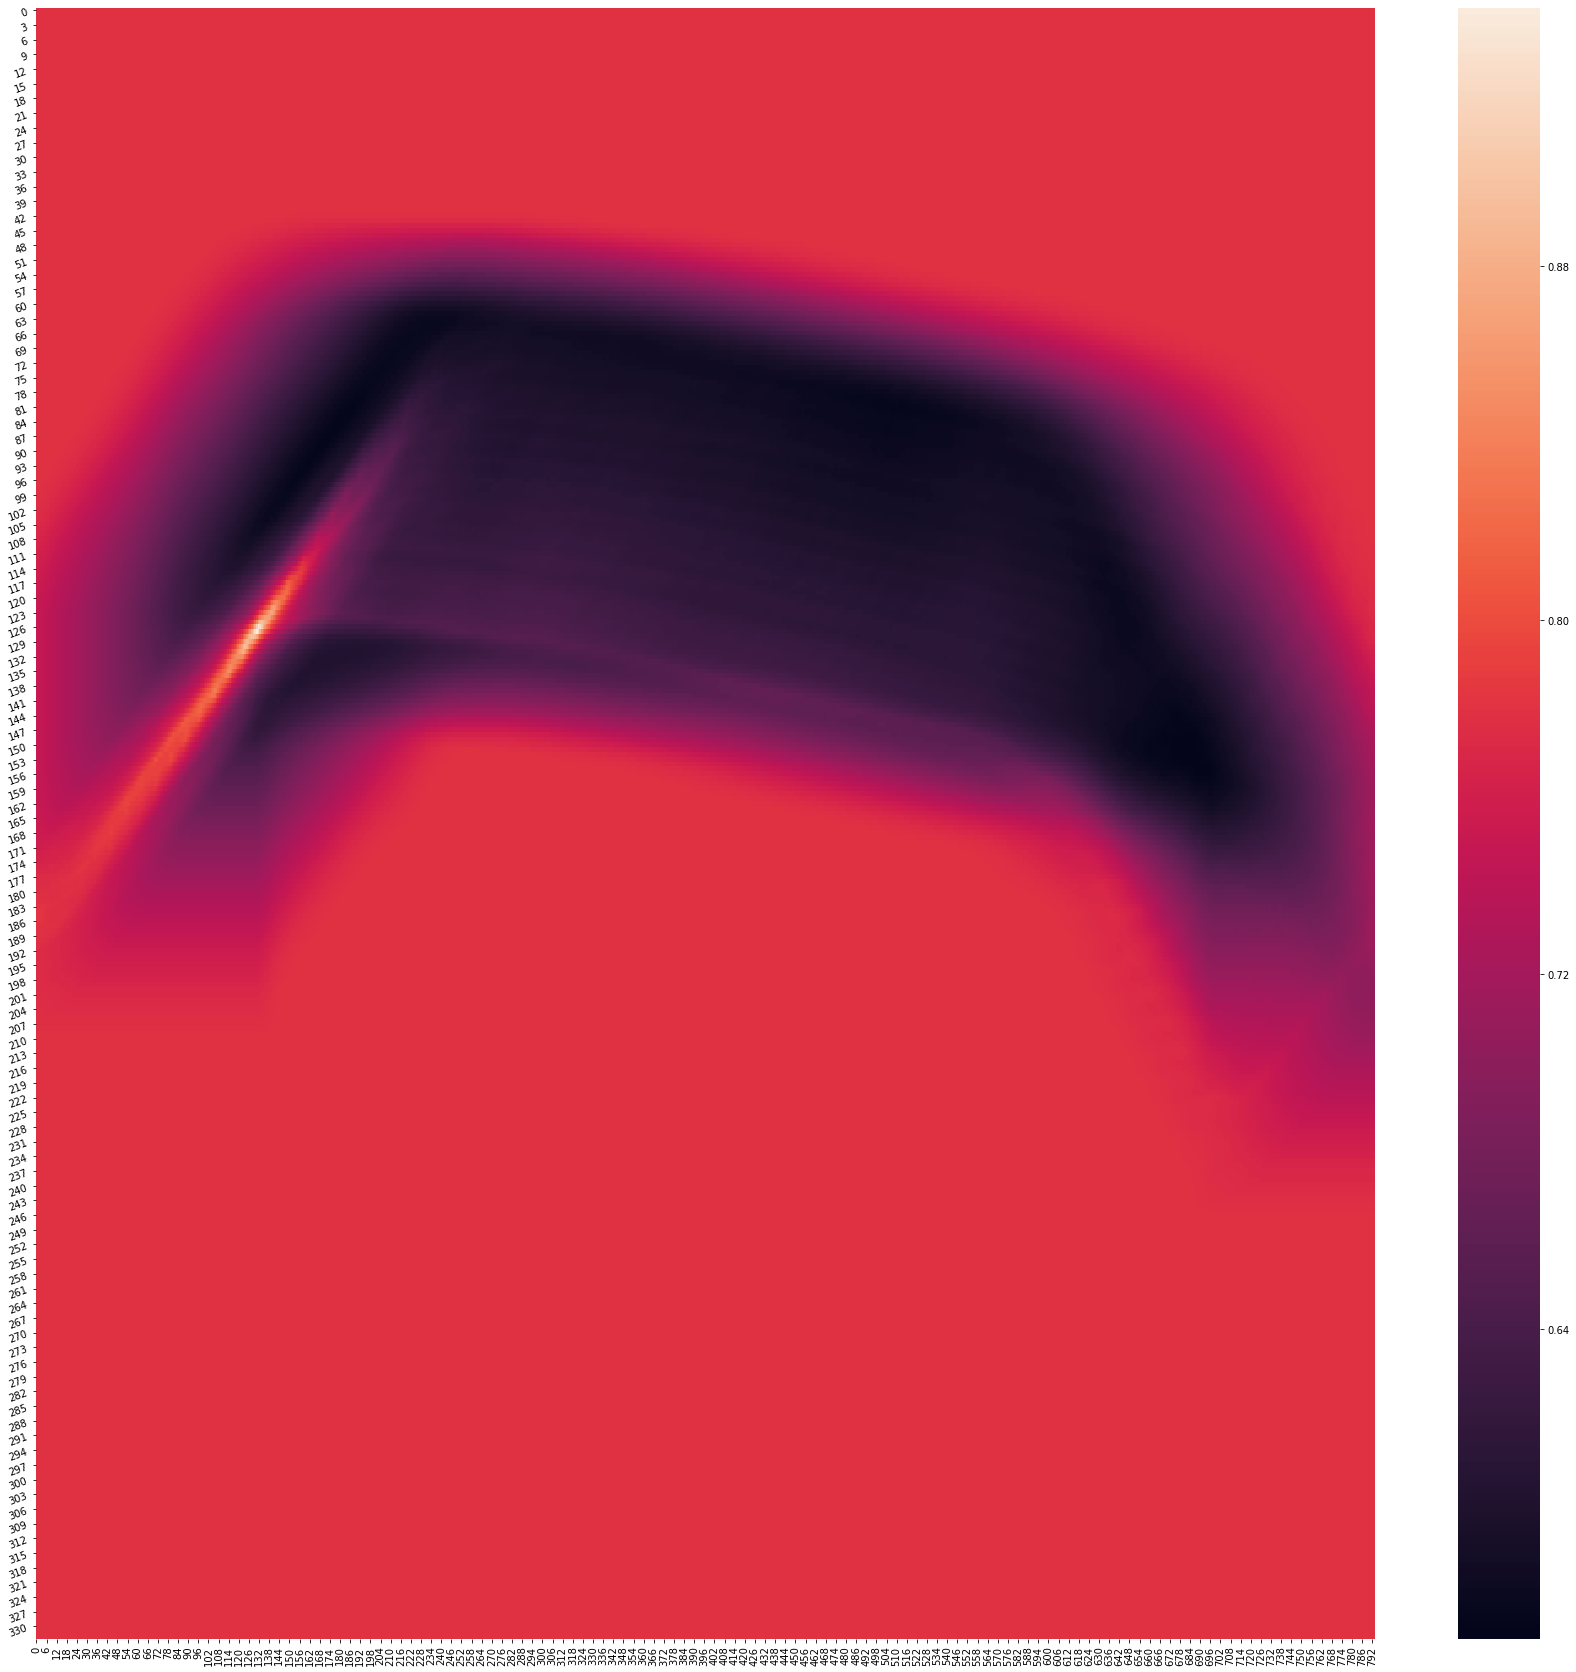

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#df_= df_.astype(float)
res1= res1.astype(float)
#print (df_.dtypes)

fig, ax = plt.subplots(figsize=(30, 30)) 
sns.heatmap(res1, annot=False, ax=ax)
plt.yticks(rotation=20) 
plt.xticks(rotation=90) 

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
         27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
         36.5,  37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44.5,
         45.5,  46.5,  47.5,  48.5,  49.5,  50.5,  51.5,  52.5,  53.5,
         54.5,  55.5,  56.5,  57.5,  58.5,  59.5,  60.5,  61.5,  62.5,
         63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,  70.5,  71.5,
         72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,  80.5,
         81.5,  82.5,  83.5,  84.5,  85.5,  86.5,  87.5,  88.5,  89.5,
         90.5,  91.5,  92.5,  93.5,  94.5,  95.5,  96.5,  97.5,  98.5,
         99.5, 100.5, 101.5, 102.5, 103.5, 104.5, 105.5, 106.5, 107.5,
        108.5, 109.5, 110.5, 111.5, 112.5, 113.5, 114.5, 115.5, 116.5,
        117.5, 118.5, 119.5, 120.5, 121.5, 122.5, 123.5, 124.5, 125.5,
      

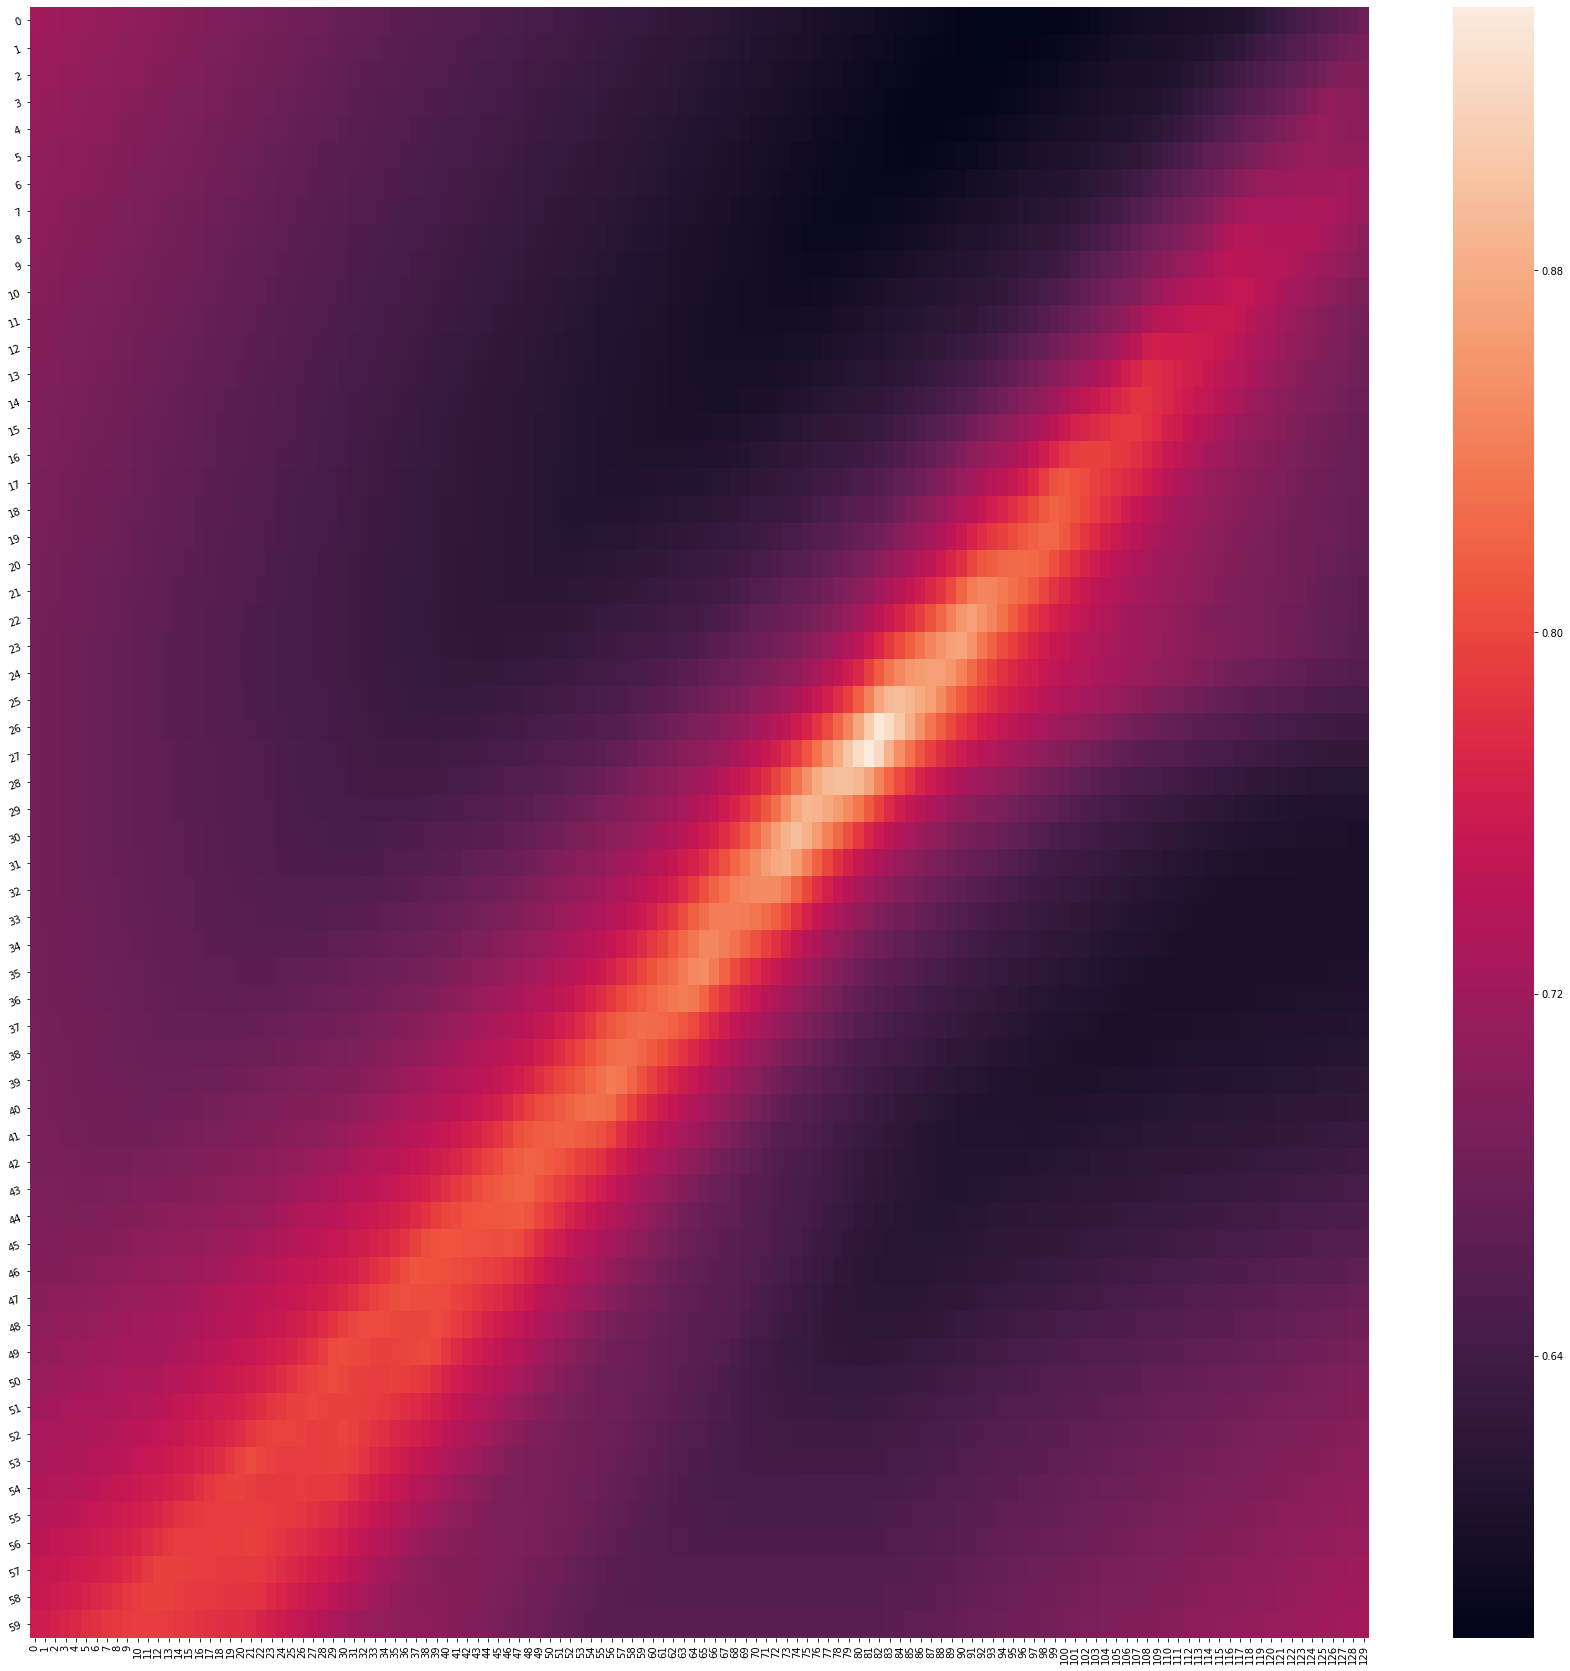

In [12]:
res1= res1.astype(float)

fig, ax = plt.subplots(figsize=(30, 30)) 
sns.heatmap(res1[100:160,50:180], annot=False, ax=ax)
plt.yticks(rotation=20) 
plt.xticks(rotation=90) 

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline

h2, w2 = template2.shape[:2]  # rows->h, cols->w
#res2 = cv2.matchTemplate(img_rgb, template2, cv2.TM_CCORR_NORMED)
res2 = SSIMLocation(img_rgb, template2)
min_val2, max_val2, min_loc2, max_loc2 = cv2.minMaxLoc(res2)

h3, w3 = template3.shape[:2]  # rows->h, cols->w
#res3 = cv2.matchTemplate(img_rgb, template3, cv2.TM_CCORR_NORMED)
res3 = SSIMLocation(img_rgb, template3)
min_val3, max_val3, min_loc3, max_loc3 = cv2.minMaxLoc(res3)


425 950 59 470
425 950 59 470


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


425 950 102 144
425 950 103 144


/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:17: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  **kwargs)


11111111111
(678, 152)
2222222222222


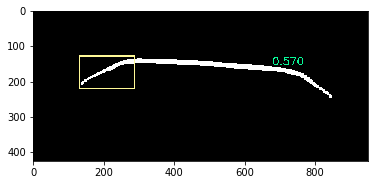

In [14]:
print ("11111111111")
print (min_loc1)
left_top = max_loc1  # 左上角
right_bottom = (left_top[0] + w1, left_top[1] + h1)  # 右下角
cv2.rectangle(img_rgb1, left_top, right_bottom,  (255,249,151), 2)  # 画出矩形位置
font = cv2.FONT_HERSHEY_SIMPLEX
lable="%.3f"%min_val1
cv2.putText(img_rgb1, lable, max_loc1, font,1, (7,249,151),2)
print ("2222222222222")
plt.imshow(img_rgb1)
plt.show()

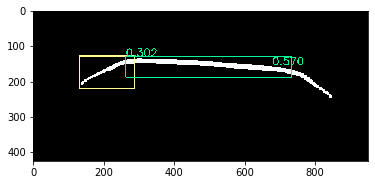

In [15]:


left_top = max_loc2  # 左上角
right_bottom = (left_top[0] + w2, left_top[1] + h2)  # 右下角
cv2.rectangle(img_rgb1, left_top, right_bottom,  (7,249,151), 2)  # 画出矩形位置

font = cv2.FONT_HERSHEY_SIMPLEX
lable="%.3f"%min_val2
cv2.putText(img_rgb1, lable, max_loc2, font,1, (7,249,151),2)
plt.imshow(img_rgb1)
plt.show()



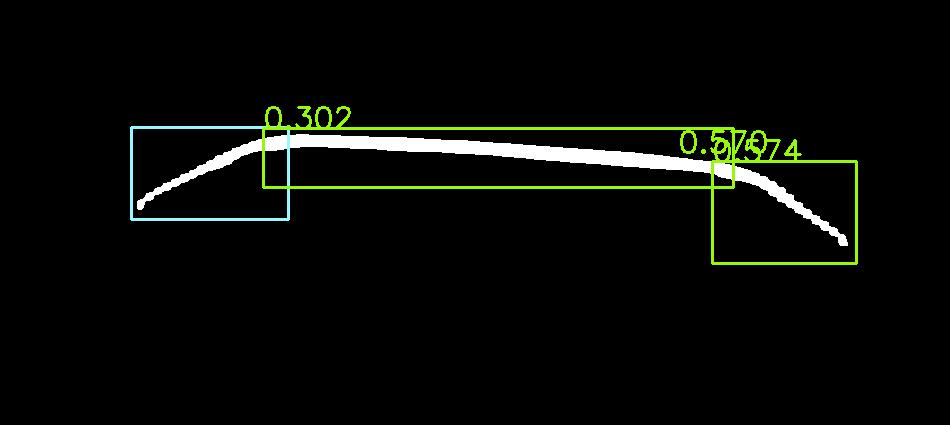

In [16]:
left_top = max_loc3  # 左上角
right_bottom = (left_top[0] + w3, left_top[1] + h3)  # 右下角
cv2.rectangle(img_rgb1, left_top, right_bottom,  (7,249,151), 2)  # 画出矩形位置
font = cv2.FONT_HERSHEY_SIMPLEX
lable="%.3f"%min_val3
cv2.putText(img_rgb1, lable, max_loc3, font,1, (7,249,151),2)


#cv2.namedWindow('img1',0)
cv2_imshow(img_rgb1)
#cv2.imwrite("RML4.5.jpg",img_rgb1)
#cv2.waitKey()
#cv2.destroyAllWindows()

#plt.imshow(img_rgb1)
#plt.axis('off') # 不显示坐标轴
#plt.show()